In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import numpy
import itertools

2025-07-17 17:53:35.143193: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 17:53:35.148355: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 17:53:35.160706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752792815.180244    4968 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752792815.186019    4968 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752792815.203081    4968 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
with open("dataset_train.pkl", "rb") as f:
    X_train, y_train = pickle.load(f)
with open("dataset_test.pkl", "rb") as f:
    X_test, y_test = pickle.load(f)

In [3]:
hidden_dim=32
num_feats = X_train.shape[1]
model = Sequential([
    Input(shape=(num_feats,)),
    Dense(hidden_dim, activation="relu"),
    Dense(hidden_dim, activation="relu"),
    Dense(hidden_dim, activation="relu"),
    Dense(1, activation="sigmoid")
])

2025-07-17 17:53:37.718812: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,validation_split=0.05,epochs=40)

Epoch 1/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5795 - loss: 8.9204 - val_accuracy: 0.6271 - val_loss: 0.7990
Epoch 2/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6415 - loss: 0.8467 - val_accuracy: 0.6014 - val_loss: 1.0917
Epoch 3/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6490 - loss: 0.7963 - val_accuracy: 0.6614 - val_loss: 0.6899
Epoch 4/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6567 - loss: 0.7324 - val_accuracy: 0.6329 - val_loss: 0.7379
Epoch 5/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6731 - loss: 0.6676 - val_accuracy: 0.6557 - val_loss: 0.6552
Epoch 6/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6748 - loss: 0.6605 - val_accuracy: 0.6486 - val_loss: 0.6976
Epoch 7/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6754 - loss: 0.6496 - val_accuracy: 0.6200 - val_loss: 0.7442
Epoch 8/40
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6704 - loss: 0.6752 - val_accuracy: 0.

In [6]:
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


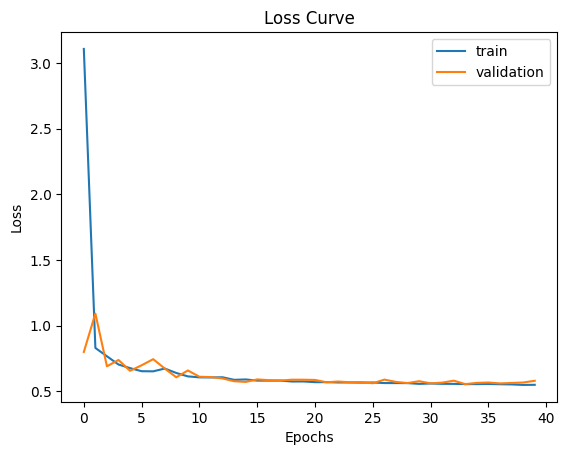

In [7]:
plt.title("Loss Curve")
plt.plot(loss, label="train")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

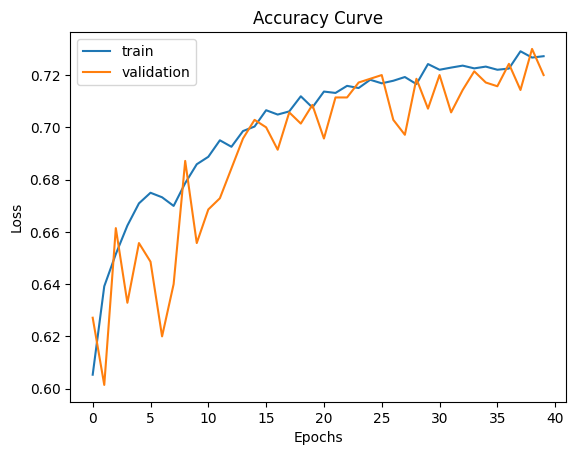

In [8]:
plt.title("Accuracy Curve")
plt.plot(accuracy, label="train")
plt.plot(val_accuracy, label="validation")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [9]:
predictions = model.predict(X_test)
true=numpy.ravel(y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


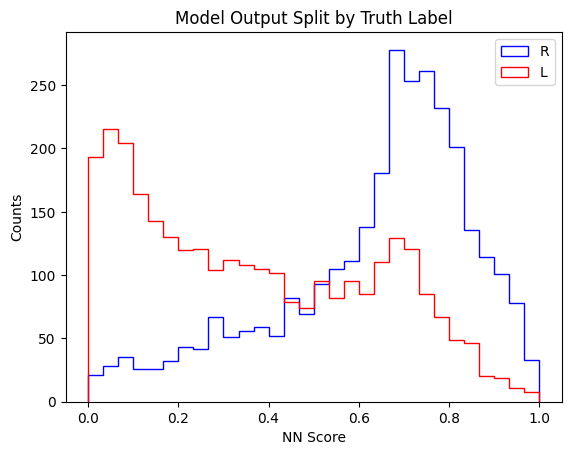

In [10]:
plt.title("Model Output Split by Truth Label")
plt.hist(predictions[true==1],label='R',histtype='step',color='b',range=(0,1),bins=30)
plt.hist(predictions[true==0],label='L',histtype='step',color='r',range=(0,1),bins=30)
plt.xlabel("NN Score")
plt.ylabel("Counts")
plt.legend()
plt.show()

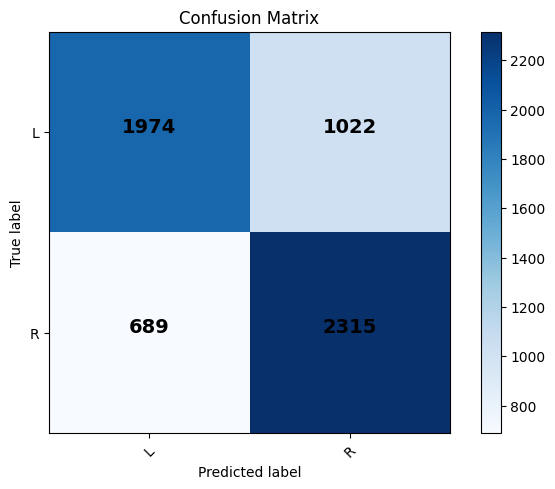

In [11]:
threshold=0.5
pred=predictions>threshold
cm = confusion_matrix(true, pred)

# Plotting
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0,1]
plt.xticks(tick_marks, ['L', 'R'], rotation=45)
plt.yticks(tick_marks, ['L', 'R'])

# Customizing text properties
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="black",
             fontweight='bold', fontsize=14)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()